In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [7]:
%%bash
pwd

/home/uri/Developer/ipynb


In [8]:
dump = pd.read_csv('/home/uri/Developer/thread_dump_sync.csv',sep=';',header=None)
dump.columns = ['n','timedelta','states']

In [9]:
aggregate =  dump.groupby(['n']).agg({'timedelta':np.mean,'states':np.mean}).reset_index()

In [10]:
aggregate['throughput'] = aggregate.states/aggregate.timedelta

In [11]:
aggregate['latency'] = 1/aggregate.throughput

In [12]:
aggregate

,n,states,timedelta,throughput,latency
0,2,100000,6625994152,1.509207e-05,6.625994e+04
1,4,100000,4248619247,2.353706e-05,4.248619e+04
2,8,100000,5946946159,1.681535e-05,5.946946e+04
3,16,100000,10845945508,9.220035e-06,1.084595e+05
4,32,100000,20268237468,4.933828e-06,2.026824e+05
5,64,100000,53637241980,1.864376e-06,5.363724e+05
6,128,100000,137266519565,7.285098e-07,1.372665e+06


In [13]:
annotations = [2**x for x in xrange(len(aggregate))]

In [21]:
def plot(num_threads,throughput):
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.plot(num_threads,throughput*10**9)
    #plt.scatter(aggregate.n,aggregate.throughput*10**9)
    plt.title("throughput")
    plt.grid(True)
    plt.ylabel(r"$ \frac{states}{sec} $")
    plt.xlabel('number of threads')
    #plt.xticks([x for x in xrange(6)])
    #plt.savefig('M100.jpg')
    plt.subplot(222)
    plt.plot(num_threads,1/(throughput*10**9) * 10**4)
    plt.title(r"latency")
    plt.grid(True)
    plt.ylabel('$ sec^{-1} * 10^4 $')
    plt.xlabel('number of threads')
    #plt.savefig('/home/uri/Developer/lock.jpg')
    plt.show()

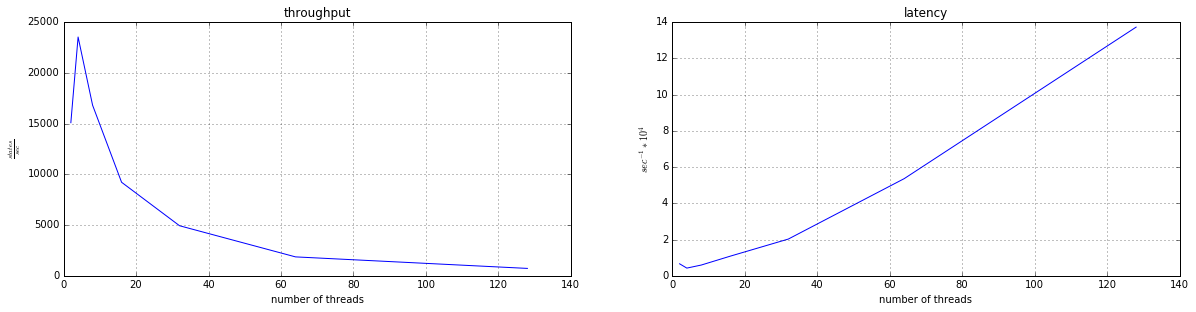

In [20]:
plot(aggregate.n,aggregate.throughput)

In [22]:
dump = pd.read_csv('/home/uri/Developer/thread_dump_lock.csv',sep=';',header=None)
dump.columns = ['n','timedelta','states']
aggregate =  dump.groupby(['n']).agg({'timedelta':np.mean,'states':np.mean}).reset_index()
aggregate['throughput'] = aggregate.states/aggregate.timedelta

In [23]:
aggregate

,n,states,timedelta,throughput
0,2,10000,677912082,1.475118e-05
1,4,10000,764378588,1.308252e-05
2,8,10000,1383779013,7.226587e-06
3,16,10000,1450646917,6.893476e-06
4,32,10000,1479660053,6.758309e-06
5,64,10000,3797788998,2.633111e-06
6,128,10000,5136983533,1.946668e-06
7,256,10000,7620508391,1.312248e-06
8,512,10000,10412908748,9.603465e-07


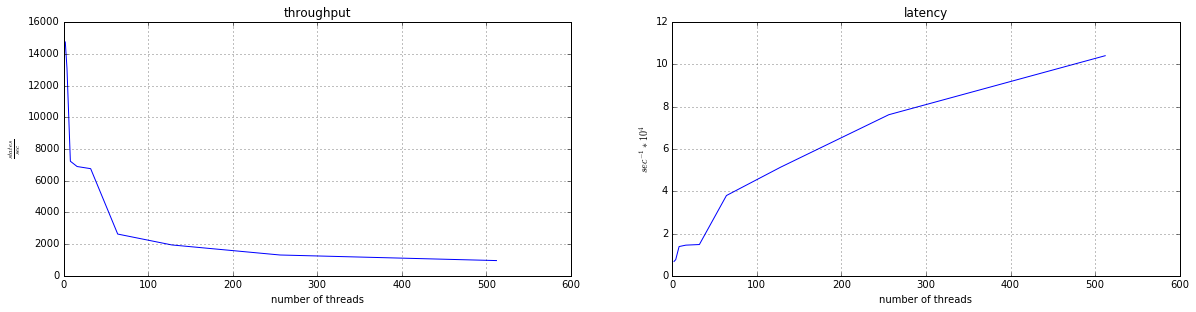

In [24]:
plot(aggregate.n,aggregate.throughput)